<a href="https://colab.research.google.com/github/loongMin/playground/blob/main/Mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Playground on minist handwriting dataset
Model consists of 2 Conv2Ds and 3 Densees, and using callBack function to stop training when loss is lower than 0.01

In [6]:
%matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input
from tensorflow.keras.activations import relu, softmax
class callBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.01):
      self.model.stop_training = True


myCallBack = callBack()
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = tf.cast(tf.expand_dims(train_images, -1), dtype=tf.float32)
test_images = tf.cast(tf.expand_dims(test_images, -1), dtype=tf.float32)
model = Sequential([
                    Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation=relu),
                    Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation=relu),
                    Flatten(),
                    Dense(units=128, activation=relu),
                    Dense(units=32, activation=relu),
                    Dense(units=10, activation=softmax)
])


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=5, callbacks=[myCallBack])

Using matplotlib backend: agg
Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2434
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0647
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0437
Epoch 4/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0348
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0232


## Now, we see its presentation

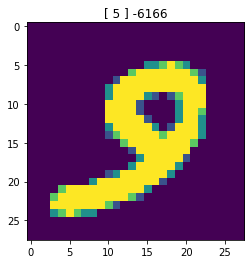

In [19]:
num = int(np.random.rand() * len(test_labels))
img = test_images[num:num+1, :, :, :]
img = tf.constant(img)
prediction = model(img)
assert (img.shape == (1, 28, 28, 1))
win_name = '[ ' + str(np.argmax(prediction[0])) + ' ] -' + str(num)
plt.title(win_name)
plt.imshow(tf.squeeze(img))